# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [3]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# How is attrition dependent on Age?

![](https://media.tenor.com/An05EeVyGroAAAAd/what-it-age-anyway-trina-espinoza.gif)


In [8]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

## Observation: 
## The attrition rate between the age groups of 28 and 32 is at its highest, as shown in the following data. With age, the attrition rate continues to decline as people prioritise work security at this time. Furthermore, because young people are still exploring at that age, between 18 and 20, the likelihood of an employee quitting the company is much higher. When you turn 21, it becomes profitable.

# -------------------------------------------------------------------------------------------

# Is income the main factor towards employee attrition?


![](https://media.tenor.com/r356DmtWu3cAAAAC/money-count.gif)


In [10]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

## Observation 
## The attrition rate is obviously high at extremely low income levels—less than 5k monthly—as shown in the above chart. This falls even more, but at 10,000, a slight bump is seen that denotes the middle class lifestyle. They frequently change jobs in order to pursue a higher level of living. The flat line indicates that there is little risk of an employee leaving the company while the monthly pay is respectable.


# -------------------------------------------------------------------------------------------

# Does the Department of work impact attrition?


![](https://media.tenor.com/wc0noOW2aU8AAAAC/not-my-department-good-omens.gif)

In [12]:
dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

## Observations 
## This information only includes three key departments, the Sales Department having the highest attrition rates (25.84%) and the Human Resource Department having the second-highest attrition rates (19.05%). According to the above figure, Research and Development has the lowest attrition rates (13.83%), which indicates the department's stability and substance.


# -------------------------------------------------------------------------------------------

# How does the environment satisfaction impact attrition?

![](https://media.tenor.com/e_hYAlvMvZgAAAAC/jake-peralta-brooklyn99.gif)

In [13]:
sats_att=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

## Observation 
## The likelihood of people quitting the company somewhat lowers in the satisfaction levels 1-2. This demonstrates the higher expectations people have of an organisation. People do, however, tend to move on as we progress from 2-3 in search of better opportunities and experiences. For the higher levels of satisfaction, the attrition rate is essentially constant.


# -------------------------------------------------------------------------------------------

# How does self Job Satisfaction impact the Attrition?


![](https://media.tenor.com/xBT-rB7I728AAAAC/i-love-my-work-missy.gif)

In [14]:
jsats_att=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

## Observation 
## As can be seen in the visualisation above, attrition rates fall as job satisfaction rises. The attrition level rises from 2-3, when people tend to choose better chances, but lowers from ranges 1-2, as noted above in Environment Satisfaction.


# -------------------------------------------------------------------------------------------


# Does company stocks for employees impact attrition?


![](https://media.tenor.com/wjS2sXen8iMAAAAM/stonks-up-stongs.gif)

In [15]:
stock_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

## Observation 
## When the stock availing options are restricted, there is a far greater potential for employees to leave the company. People do not want to miss out on the opportunity to invest in stocks because they can generate enormous amounts of money over the course of a few years. People who have few or no other options are able to leave the organisation whenever they want.


# -------------------------------------------------------------------------------------------


# How does Work Life Balance impact the overall attrition rates?


![](https://media.tenor.com/-aNZKFMmUicAAAAC/balance-life-and-work.gif)


In [16]:
wlb_att=data.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

## Observation
## People with low levels of work-life balance have acclimated to their occupations; nevertheless, as demonstrated in the above parameters with a higher work-life balance score, people are more used to a better life and want to attrition more. However, this trend fades when people are happy with their jobs and have a healthy work-life balance.


# -------------------------------------------------------------------------------------------


# How does work experience affect attrition?

![](https://media.tenor.com/UQLt4Q0tE_YAAAAC/steven-he-work.gif)

In [17]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

## Observations
## As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.



# -------------------------------------------------------------------------------------------

# How does Work duration in current role impact Attrition?


![](https://media.tenor.com/uIv82LxYGJYAAAAd/i-work-from9to5-ardhito-pramono.gif)

In [18]:
yrscr_att=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

## Observation 
## We've seen that people are more likely to depart an organisation in their first few years on the job. People who have been in the same role for a long time tend to stay longer in order to advance.


# -------------------------------------------------------------------------------------------

# Does Hike percentage impact Attrition?

![](https://media.tenor.com/qV4pmU5GjrEAAAAd/price-peux.gif)


In [19]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

## Observation
## Higher raises encourage employees to work harder and stay with the company. As a result, the likelihood of an employee quitting an organisation where the hike is lower is significantly higher than in a company that provides a good hike.


# -------------------------------------------------------------------------------------------

# Are managers a reason of people resigning??


![](https://media.tenor.com/zWnTBUB0_kUAAAAC/michael-scott-the-manager.gif)

In [21]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

## Observation
## Observation When we examine an employee's relationship with their manager, we discover three notable jumps in the attrition rate. People tend to leave their positions at the beginning, when their time spent with the management is relatively short, because of their relationship with their former supervisors. When employees feel they need to improve, they are more likely to seek a change over a two-year period. When the period spent with the management is significantly longer (about 7 years), people tend to get dissatisfied with their professional growth and seek a change. People are satisfied with their work when they spend a lot of time with their management. As a result, the likelihood of an employee resigning get significantly low.


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Correlation between features -
### Correlation heatmap (Pearson method)

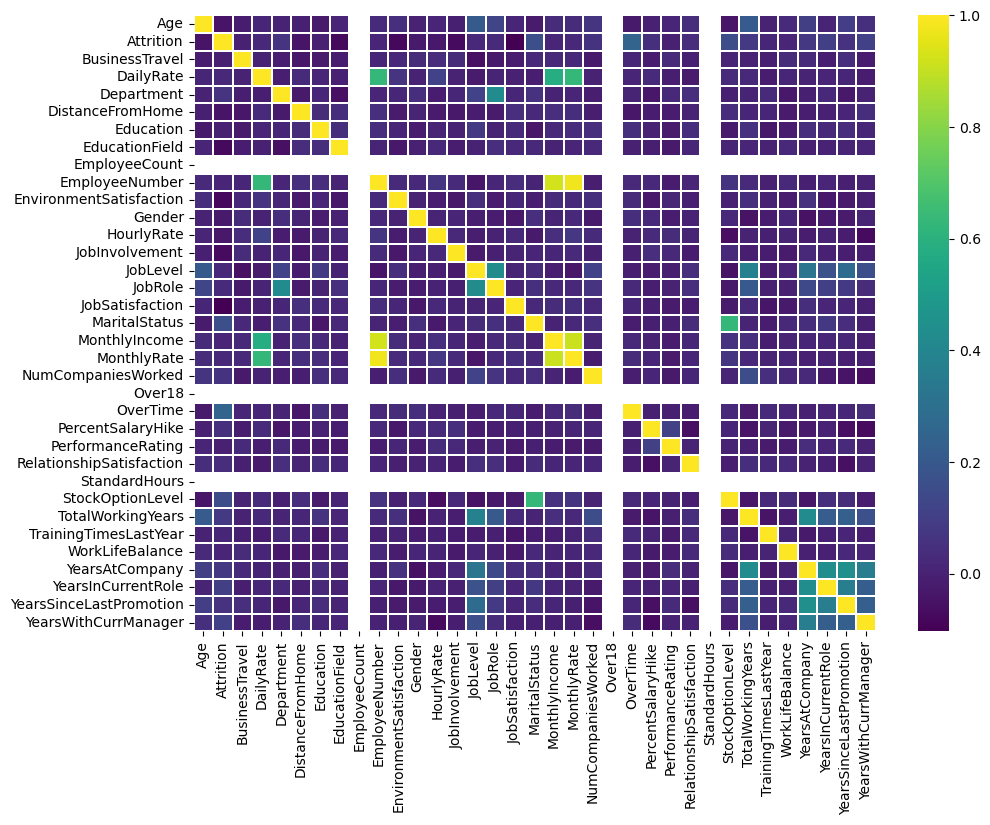

In [32]:
plt.figure(figsize=(11, 8))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="viridis")

# Label Encoder:

### For converting Churn into numerical

In [36]:
le = preprocessing.LabelEncoder()

In [40]:
le.fit(data['Attrition'])

LabelEncoder()

In [41]:
data['Attrition'] = le.fit_transform(data['Attrition'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# One Hot Encoder:

### For all categorical columns in X

In [44]:
cat_cols = data.select_dtypes(include=['object']).columns

In [46]:
cat_cols = [col for col in cat_cols if data[col].nunique() < 10]

In [47]:
ohe = OneHotEncoder()

In [48]:
data_cat = pd.DataFrame(ohe.fit_transform(data[cat_cols]).toarray(), columns=ohe.get_feature_names_out())

In [50]:
data_cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [51]:
data = data.drop(columns=cat_cols)

In [52]:
data = pd.concat([data, data_cat], axis=1)

In [53]:
data = data.dropna()

In [55]:
data.isna().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion  

# Train Test Split

In [56]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Decision Tree

In [58]:
clf = DecisionTreeClassifier(min_samples_split=500)

In [59]:
clf = clf.fit(X_train, y_train)

In [60]:
clf

DecisionTreeClassifier(min_samples_split=500)

[Text(0.4, 0.9166666666666666, 'x[19] <= 1.5\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.2, 0.75, 'gini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.6, 0.75, 'x[54] <= 0.5\ngini = 0.235\nsamples = 1098\nvalue = [949, 149]'),
 Text(0.4, 0.5833333333333334, 'x[21] <= 1.5\ngini = 0.162\nsamples = 798\nvalue = [727, 71]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.38\nsamples = 47\nvalue = [35, 12]'),
 Text(0.6, 0.4166666666666667, 'x[22] <= 38.5\ngini = 0.145\nsamples = 751\nvalue = [692, 59]'),
 Text(0.4, 0.25, 'x[22] <= 4.5\ngini = 0.143\nsamples = 750\nvalue = [692, 58]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.218\nsamples = 257\nvalue = [225, 32]'),
 Text(0.6, 0.08333333333333333, 'gini = 0.1\nsamples = 493\nvalue = [467, 26]'),
 Text(0.8, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5833333333333334, 'gini = 0.385\nsamples = 300\nvalue = [222, 78]')]

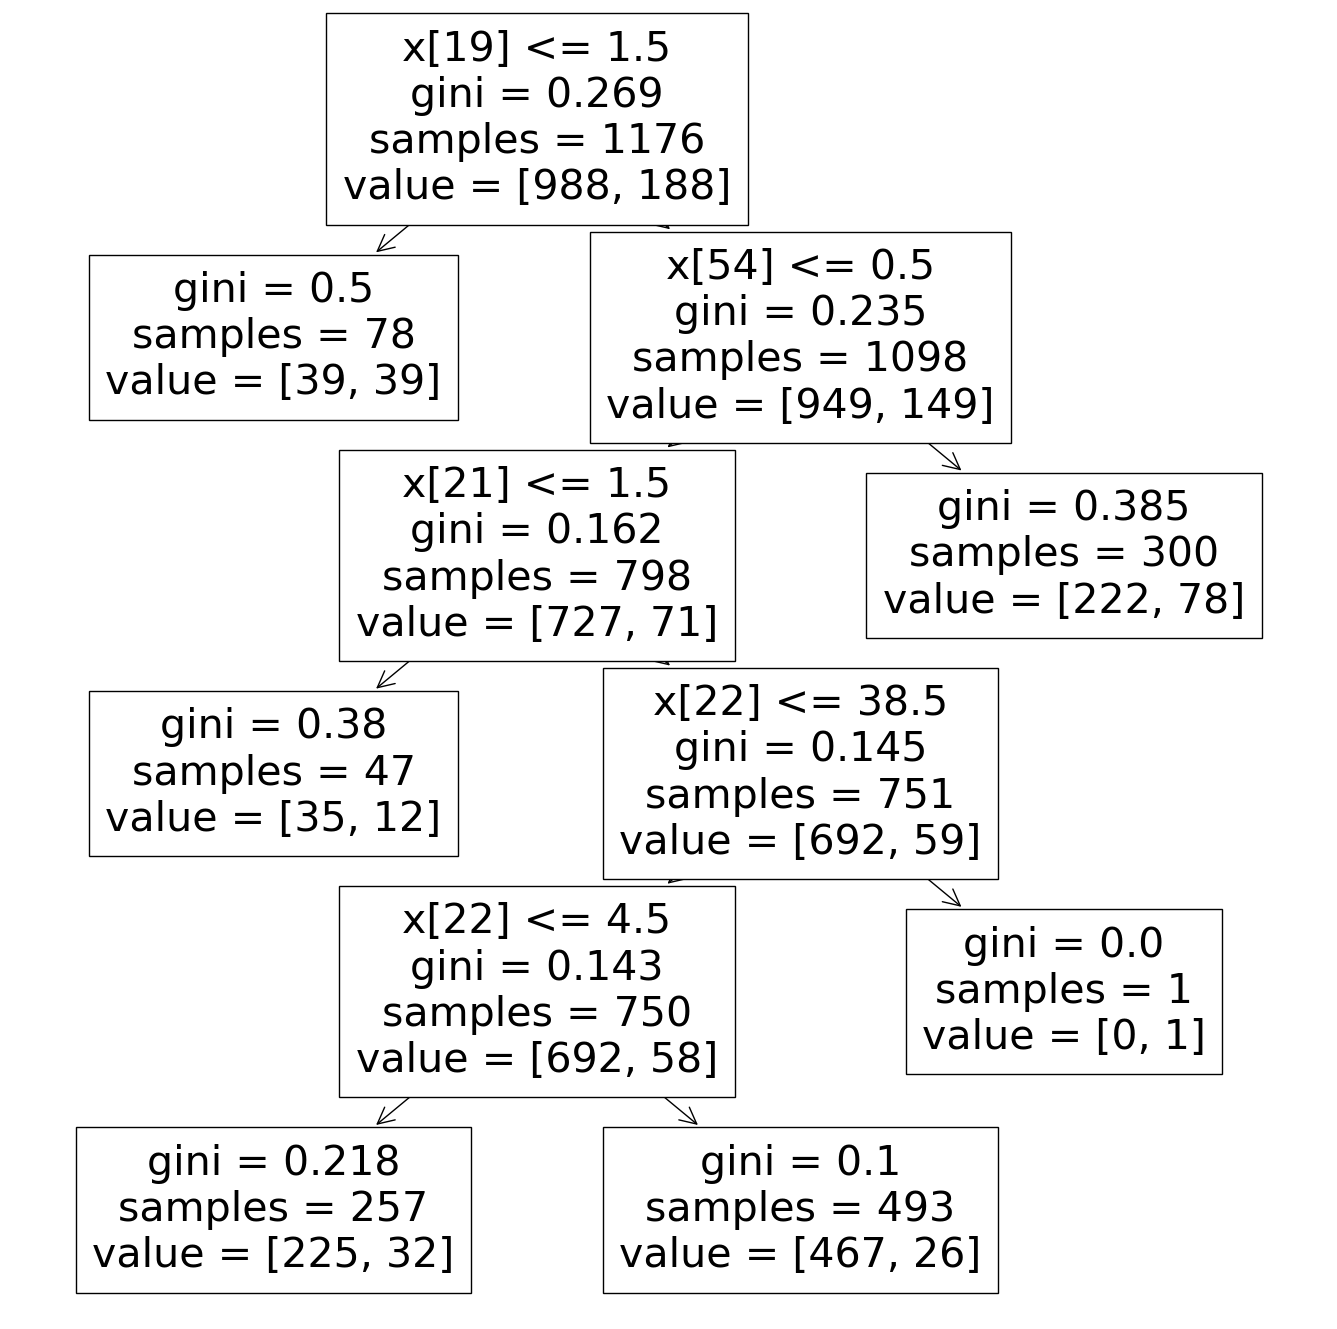

In [61]:
plt.figure(figsize = (17,17))
tree.plot_tree(clf)

# Accuracy Score
## Training Accuracy

In [63]:
y_pred_train_clf = clf.predict(X_train)

In [64]:
y_pred_train_clf

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [66]:
acc

0.8409863945578231

In [67]:
cm = confusion_matrix(y_train,y_pred_train_clf)

# Confusion Matrix for Training data 

Text(0.5, 1.0, 'Prediction')

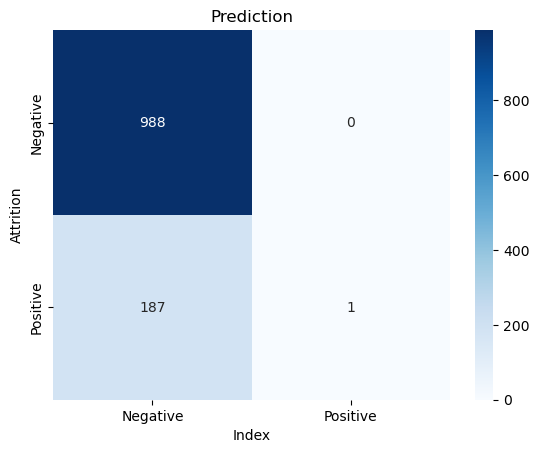

In [68]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Attrition')
plt.title('Prediction')

## Testing Accuracy

In [71]:
y_pred_test_clf = clf.predict(X_test)

In [72]:
acc = accuracy_score(y_test,y_pred_test_clf)

In [73]:
acc

0.8333333333333334

## Confusion Matrix for Testing data

Text(0.5, 1.0, 'Prediction')

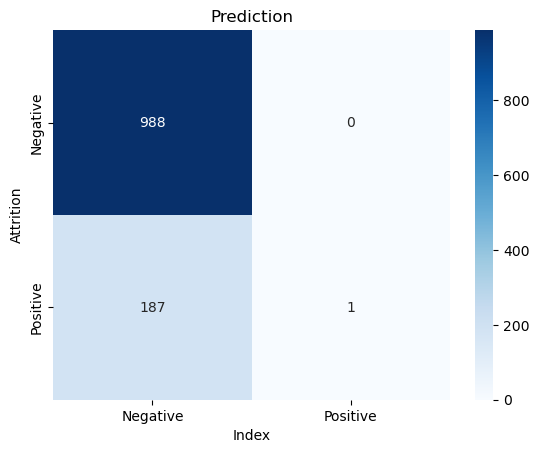

In [74]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Attrition')
plt.title('Prediction')

# --------------------------------------FIN-------------------------------------------------